## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner' )

# Display the data table for preview

mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#show column headings for mouse_metadata
mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [4]:
#show column headings for study_results
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [5]:
# Checking the number of mice.
mouse_count = len(mouse_metadata['Mouse ID'].value_counts())
mouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
ms_dupl = mouse_study[mouse_study.duplicated(['Mouse ID','Timepoint'])]
ms_dupl.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mice by its ID.

dup_drop = mouse_study[mouse_study['Mouse ID'] == 'g989'].index
 
# Delete these row indexes from dataFrame
mouse_study.drop(dup_drop , inplace=True)

mouse_study['Mouse ID'].value_counts()

mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
len(mouse_study['Mouse ID'].unique())

248

In [9]:
# Checking the number of mice in the clean DataFrame.

final_mouse_count = len(mouse_study['Mouse ID'].value_counts())
print(final_mouse_count)


248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

ms_drug_reg = mouse_study.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#mean
ms_tumor_mean = ms_drug_reg['Tumor Volume (mm3)'].mean()
#print(ms_tumor_mean)

#median
ms_tumor_med = ms_drug_reg['Tumor Volume (mm3)'].median()

#variance
ms_tumor_var = ms_drug_reg['Tumor Volume (mm3)'].var()

#standard deviation
ms_tumor_std = ms_drug_reg['Tumor Volume (mm3)'].std()

#SEM
ms_tumor_sem = ms_drug_reg['Tumor Volume (mm3)'].sem()

#Assemble the resulting series into a single summary dataframe.
ms_tumor_df = pd.DataFrame({'Tumor Volume Mean':ms_tumor_mean, 'Tumor Volume Median':ms_tumor_med, 'Tumor Volume Variance': ms_tumor_var, "Tumor Volume Std":ms_tumor_std, 'Tumor Volume SEM':ms_tumor_sem})

ms_tumor_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
ms_agg = mouse_study.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
ms_agg.head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

Text(0, 0.5, 'Total Timepoints')

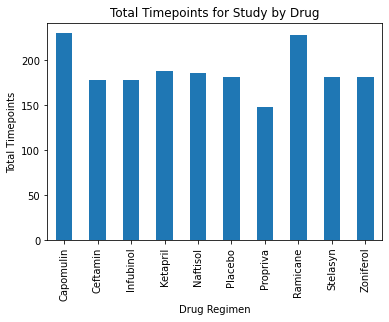

In [202]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ms_tot_tp = ms_drug_reg['Timepoint'].count()

ms_tot_tp.plot(kind='bar')
plt.title('Total Timepoints for Study by Drug')
plt.ylabel('Total Timepoints')

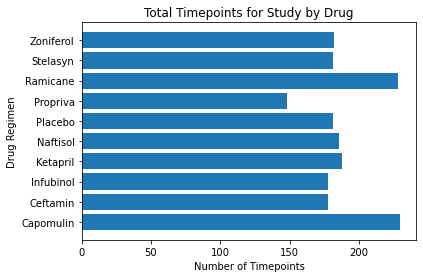

In [204]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

ms_drugs = ms_drug_reg['Timepoint'].count().index.tolist()

plt.barh(ms_drugs, ms_tot_tp)

plt.title('Total Timepoints for Study by Drug')
plt.xlabel('Number of Timepoints')
plt.ylabel('Drug Regimen')
plt.show()

Text(0.5, 1.0, 'Male vs Female')

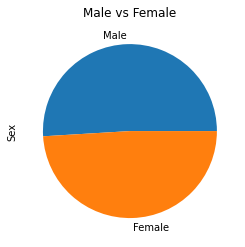

In [187]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ms_sex_vs = mouse_study['Sex'].value_counts()
ms_sex_vs.plot(kind='pie')
plt.title('Male vs Female')

Text(0.5, 1.0, 'Males vs Females')

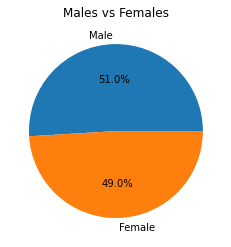

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male','Female']
plt.pie(ms_sex_vs, labels=labels, autopct='%1.1f%%')
plt.title('Males vs Females')


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

ms_drug_id = mouse_study.groupby(['Mouse ID','Drug Regimen'])

# Start by getting the last (greatest) timepoint for each mouse

df1 = ms_drug_id['Timepoint'].max()
df1

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#merge_new_df = pd.merge(df1, mouse_study)


Mouse ID  Drug Regimen
a203      Infubinol       45
a251      Infubinol       45
a262      Placebo         45
a275      Ceftamin        45
a366      Stelasyn        30
                          ..
z435      Propriva        10
z578      Ramicane        45
z581      Infubinol       45
z795      Naftisol        45
z969      Naftisol        45
Name: Timepoint, Length: 248, dtype: int64

In [50]:
# Put treatments into a list for for loop (and later for plot labels)
spec_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol_max = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in spec_drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

SyntaxError: unexpected EOF while parsing (<ipython-input-50-0362e6866dbf>, line 17)

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


cap_df = mouse_study[mouse_study.loc[:,'Drug Regimen'] == 'Capomulin']

cap_df

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#plt.title('Average Tumor Volume vs Mouse Weight')
#plt.xlabel('Average Tumor Volume')
#plt.ylabel('Mouse Weight (g)')
#plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#m_weight = cap_df.loc[:, 'Weight (g)']
#m_weight_float = m_weight.astype('float')
#avg_tum_vol = cap_df.loc[:,'Tumor Volume (mm3)'].mean()

#correlation = st.pearsonr(m_weight, avg_tum_vol)